In [1]:
!nvidia-smi

Sat May  8 15:29:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !unzip -q bt.zip
# !pip install scikit-plot scipy==1.2.0

In [4]:
import os
import time
import torch
import pickle
import numpy as np
import pandas as pd
from bt.data import *
import torch.nn as nn
from bt.models import *
from bt.utils import *
from torchvision import transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold, train_test_split
from torchvision.models import inception_v3, resnet50, vgg16, vgg16_bn

In [5]:
batch_size = 32

n_classes = 3

epochs = 1

lr = 3e-4

num_workers = 4

image_size = (299, 299)

class_names = ['Glioma', 'Meningioma', 'Pituitary']

images_dir = 'data/'
model_dir = 'models/'

os.makedirs(model_dir, exist_ok=True)

df = pd.DataFrame(columns=['model', 'accuracy', 'loss', 'precision_class_wise', 'precision_avg', 'recall_class_wise', 'recall_avg', 'f1_class_wise', 'f1_avg'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [6]:
dataset = ImageFolder(root=images_dir)

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101) 

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.117329  Accuracy: 28.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.877716  Accuracy: 60.416667%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.830188  Accuracy: 61.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.572007  Accuracy: 66.964286%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.311349  Accuracy: 71.527778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.347662  Accuracy: 73.579545%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.201732  Accuracy: 76.923077%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.244445  Accuracy: 78.333333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.319689  Accuracy: 79.411765%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.547646  Accuracy: 80.098684%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.399898  Accuracy: 80.952381%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.239599  Accuracy: 81.521739%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.177058  Accuracy: 82.12500

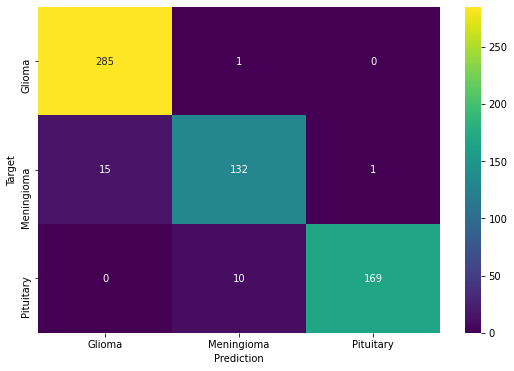


Accuracy Score: 0.9560

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       286
         1.0       0.92      0.89      0.91       148
         2.0       0.99      0.94      0.97       179

    accuracy                           0.96       613
   macro avg       0.96      0.94      0.95       613
weighted avg       0.96      0.96      0.96       613


Precision Score (Class-Wise): 
[0.95       0.92307692 0.99411765]
Average Precision Score: 0.9557315233785822

Recall Score (Class-Wise): 
[0.9965035  0.89189189 0.94413408]
Average Recall Score: 0.9441764888692262

F1 Score (Class-Wise): 
[0.97269625 0.90721649 0.96848138]
Average F1: 0.9494647053124384

Finished Training

Training Duration 1.12 minutes
GPU memory used : 354434560 kb
GPU memory cached : 6689914880 kb


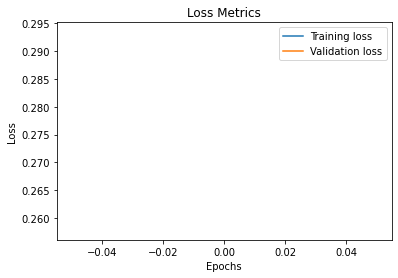

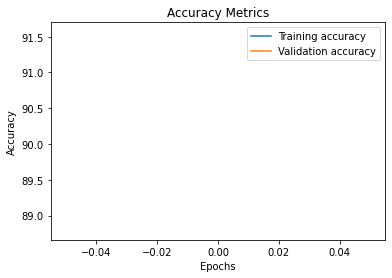

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.093036  Accuracy: 46.875000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.849885  Accuracy: 64.583333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.735049  Accuracy: 68.750000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.512208  Accuracy: 73.214286%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.428791  Accuracy: 75.000000%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.349676  Accuracy: 75.284091%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.667266  Accuracy: 75.961538%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.198689  Accuracy: 78.333333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.276773  Accuracy: 79.595588%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.344890  Accuracy: 79.934211%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.194912  Accuracy: 81.398810%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.134253  Accuracy: 82.744565%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.084089  Accuracy: 83.37500

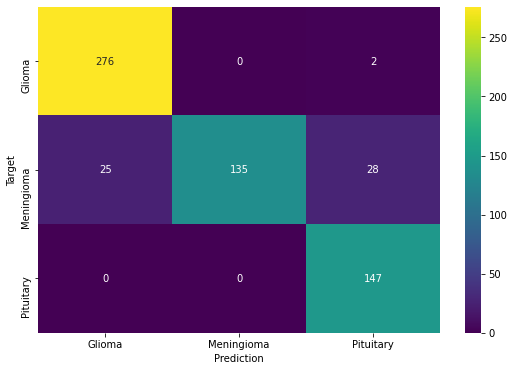


Accuracy Score: 0.9103

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       278
         1.0       1.00      0.72      0.84       188
         2.0       0.83      1.00      0.91       147

    accuracy                           0.91       613
   macro avg       0.92      0.90      0.90       613
weighted avg       0.92      0.91      0.91       613


Precision Score (Class-Wise): 
[0.91694352 1.         0.83050847]
Average Precision Score: 0.9158173320569851

Recall Score (Class-Wise): 
[0.99280576 0.71808511 1.        ]
Average Recall Score: 0.9036302872595541

F1 Score (Class-Wise): 
[0.95336788 0.83591331 0.90740741]
Average F1: 0.8988961985828582

Finished Training

Training Duration 1.12 minutes
GPU memory used : 352871424 kb
GPU memory cached : 6692012032 kb


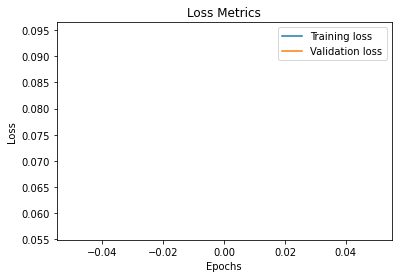

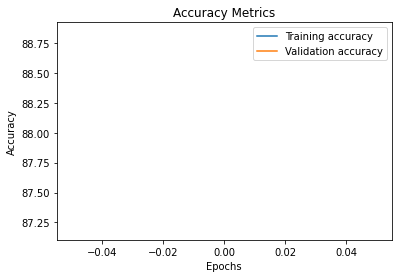

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.109555  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.926741  Accuracy: 52.083333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.694316  Accuracy: 61.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.619964  Accuracy: 69.642857%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.474638  Accuracy: 72.916667%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.432791  Accuracy: 76.420455%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.291484  Accuracy: 79.086538%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.212265  Accuracy: 81.041667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.201044  Accuracy: 82.536765%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.256878  Accuracy: 83.223684%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.454102  Accuracy: 83.333333%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.131636  Accuracy: 84.239130%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.271984  Accuracy: 84.50000

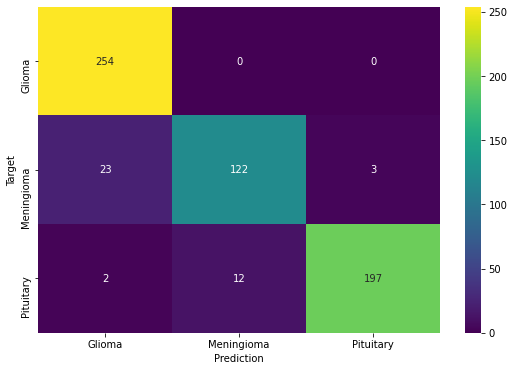


Accuracy Score: 0.9347

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       254
         1.0       0.91      0.82      0.87       148
         2.0       0.98      0.93      0.96       211

    accuracy                           0.93       613
   macro avg       0.94      0.92      0.93       613
weighted avg       0.94      0.93      0.93       613


Precision Score (Class-Wise): 
[0.91039427 0.91044776 0.985     ]
Average Precision Score: 0.9352806754756683

Recall Score (Class-Wise): 
[1.         0.82432432 0.93364929]
Average Recall Score: 0.9193245378079501

F1 Score (Class-Wise): 
[0.95309568 0.86524823 0.95863747]
Average F1: 0.9256604604465771

Finished Training

Training Duration 1.12 minutes
GPU memory used : 354128896 kb
GPU memory cached : 6692012032 kb


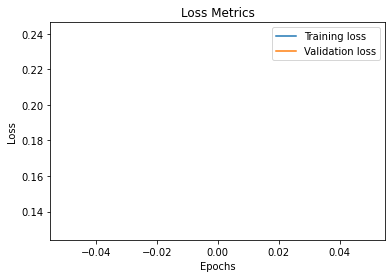

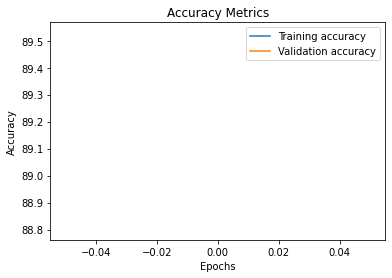

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.087945  Accuracy: 40.625000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.871727  Accuracy: 56.250000%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.543003  Accuracy: 71.250000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.500631  Accuracy: 75.000000%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.354425  Accuracy: 77.430556%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.323582  Accuracy: 79.545455%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.440775  Accuracy: 81.250000%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.259451  Accuracy: 81.666667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.257817  Accuracy: 82.352941%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.341837  Accuracy: 82.401316%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.302753  Accuracy: 83.184524%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.459337  Accuracy: 82.744565%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.121186  Accuracy: 83.62500

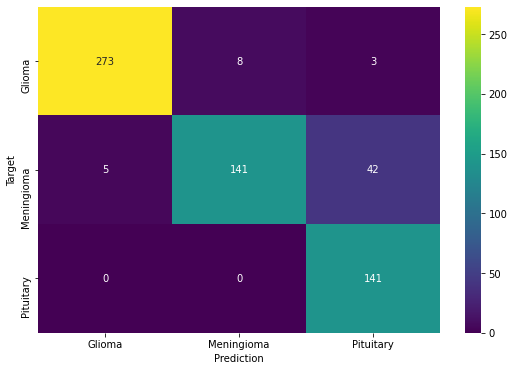


Accuracy Score: 0.9054

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       284
         1.0       0.95      0.75      0.84       188
         2.0       0.76      1.00      0.86       141

    accuracy                           0.91       613
   macro avg       0.90      0.90      0.89       613
weighted avg       0.92      0.91      0.91       613


Precision Score (Class-Wise): 
[0.98201439 0.94630872 0.75806452]
Average Precision Score: 0.8954625431501518

Recall Score (Class-Wise): 
[0.96126761 0.75       1.        ]
Average Recall Score: 0.903755868544601

F1 Score (Class-Wise): 
[0.97153025 0.83679525 0.86238532]
Average F1: 0.8902369408122524

Finished Training

Training Duration 1.12 minutes
GPU memory used : 353672704 kb
GPU memory cached : 6692012032 kb


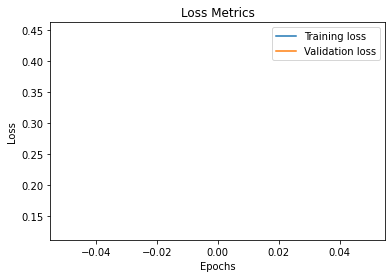

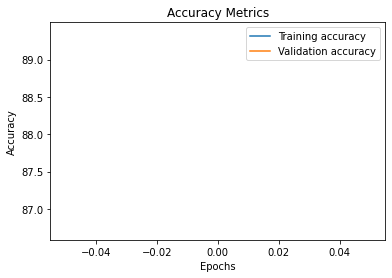

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.123028  Accuracy: 18.750000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.939288  Accuracy: 45.833333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.853215  Accuracy: 59.375000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.596904  Accuracy: 64.285714%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.500329  Accuracy: 67.708333%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.319113  Accuracy: 71.875000%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.435408  Accuracy: 74.759615%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.340071  Accuracy: 75.833333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.150086  Accuracy: 77.941176%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.169537  Accuracy: 79.440789%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.192410  Accuracy: 80.803571%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.256109  Accuracy: 81.521739%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.544910  Accuracy: 81.62500

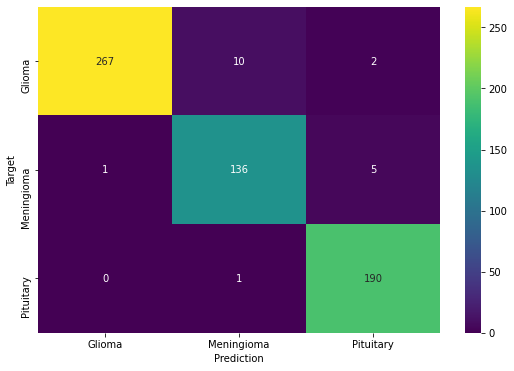


Accuracy Score: 0.9690

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       279
         1.0       0.93      0.96      0.94       142
         2.0       0.96      0.99      0.98       191

    accuracy                           0.97       612
   macro avg       0.96      0.97      0.97       612
weighted avg       0.97      0.97      0.97       612


Precision Score (Class-Wise): 
[0.99626866 0.92517007 0.96446701]
Average Precision Score: 0.9619685766065903

Recall Score (Class-Wise): 
[0.95698925 0.95774648 0.9947644 ]
Average Recall Score: 0.9698333746969423

F1 Score (Class-Wise): 
[0.976234   0.94117647 0.97938144]
Average F1: 0.9655973058478372

Finished Training

Training Duration 1.13 minutes
GPU memory used : 352741888 kb
GPU memory cached : 6692012032 kb


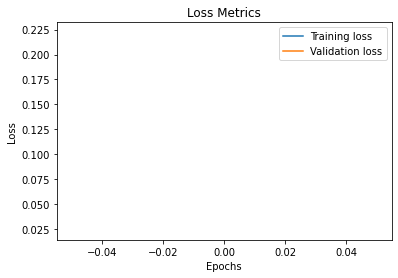

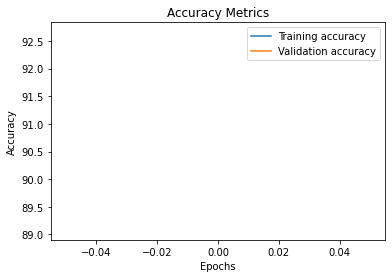

In [8]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'xception_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform_xception)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform_xception)
    
    model = xception()

    model.last_linear = nn.Linear(2048, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('xception_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.088724  Accuracy: 40.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.680355  Accuracy: 76.217532%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.293165  Accuracy: 81.433225%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.592817  Accuracy: 84.218750%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.366781  Accuracy: 85.715742%
Epoch 1 | Training Accuracy: 85.715744% | Training Loss: 0.366781
Test accuracy: 96.103897% | Test Loss: 0.111021
Test accuracy (wo augmentation): 95.779221% | Test Loss: 0.007774
Test Metrics: 



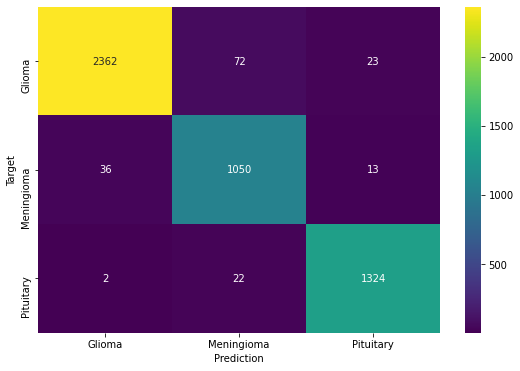


Accuracy Score: 0.9657

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2457
         1.0       0.92      0.96      0.94      1099
         2.0       0.97      0.98      0.98      1348

    accuracy                           0.97      4904
   macro avg       0.96      0.97      0.96      4904
weighted avg       0.97      0.97      0.97      4904


Precision Score (Class-Wise): 
[0.98416667 0.91783217 0.97352941]
Average Precision Score: 0.9585094154211801

Recall Score (Class-Wise): 
[0.96133496 0.95541401 0.98219585]
Average Recall Score: 0.9663149399237149

F1 Score (Class-Wise): 
[0.97261684 0.9362461  0.97784343]
Average F1: 0.9622354558432367



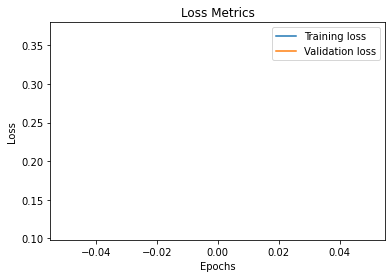

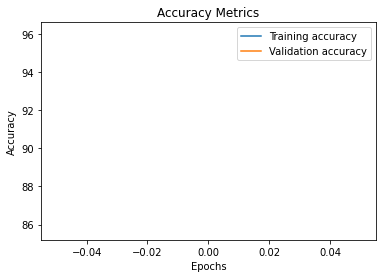

Test Metrics (wo augmentation): 



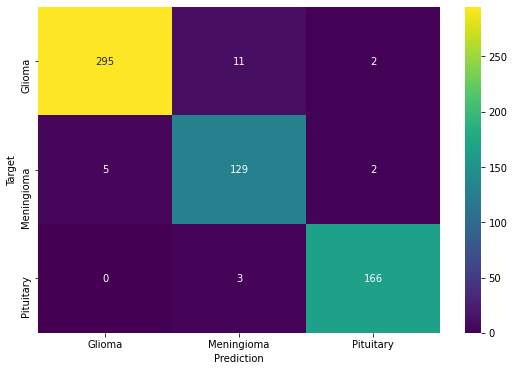


Accuracy Score: 0.9625

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       308
         1.0       0.90      0.95      0.92       136
         2.0       0.98      0.98      0.98       169

    accuracy                           0.96       613
   macro avg       0.95      0.96      0.96       613
weighted avg       0.96      0.96      0.96       613


Precision Score (Class-Wise): 
[0.98333333 0.9020979  0.97647059]
Average Precision Score: 0.9539672745555099

Recall Score (Class-Wise): 
[0.95779221 0.94852941 0.98224852]
Average Recall Score: 0.9628567134223243

F1 Score (Class-Wise): 
[0.97039474 0.92473118 0.97935103]
Average F1: 0.9581589840287273



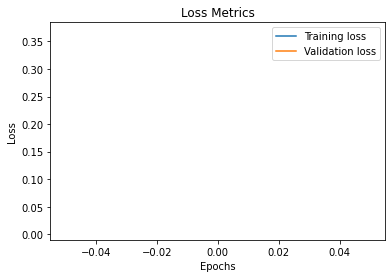

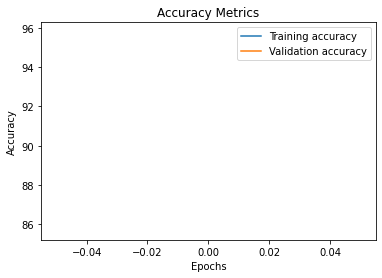

Finished Training

Training Duration 5.95 minutes
GPU memory used : 357453312 kb
GPU memory cached : 6694109184 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.099841  Accuracy: 34.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.482590  Accuracy: 79.200487%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.379389  Accuracy: 83.204397%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.186453  Accuracy: 85.482337%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.355038  Accuracy: 86.495718%
Epoch 1 | Training Accuracy: 86.495720% | Training Loss: 0.355038
Test accuracy: 89.650970% | Test Loss: 0.268656
Test accuracy (wo augmentation): 90.909088% | Test Loss: 0.032960
Test Metrics: 



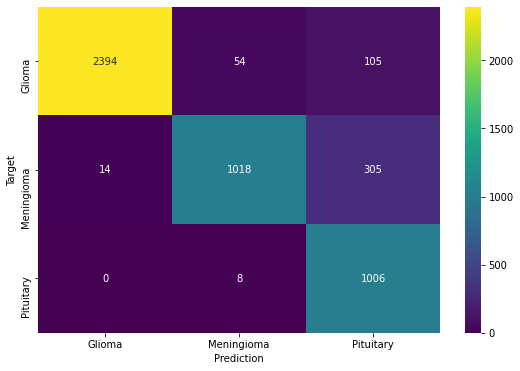


Accuracy Score: 0.9009

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2553
         1.0       0.94      0.76      0.84      1337
         2.0       0.71      0.99      0.83      1014

    accuracy                           0.90      4904
   macro avg       0.88      0.90      0.88      4904
weighted avg       0.92      0.90      0.90      4904


Precision Score (Class-Wise): 
[0.99418605 0.94259259 0.71045198]
Average Precision Score: 0.8824102055017834

Recall Score (Class-Wise): 
[0.93772033 0.76140613 0.99211045]
Average Recall Score: 0.8970789719358246

F1 Score (Class-Wise): 
[0.965128   0.84236657 0.82798354]
Average F1: 0.8784927025367768



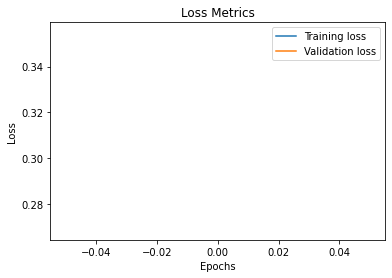

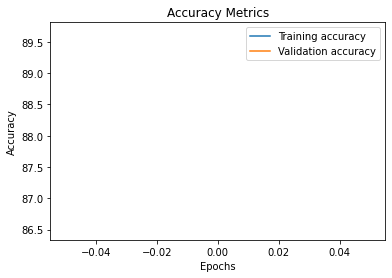

Test Metrics (wo augmentation): 



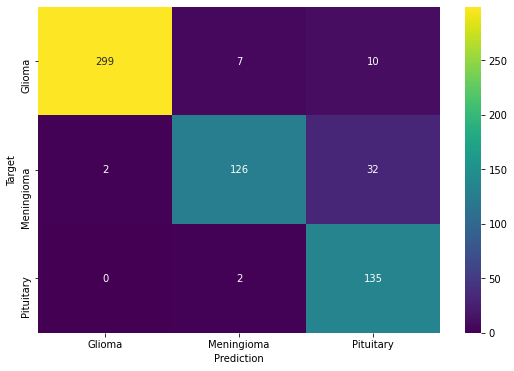


Accuracy Score: 0.9135

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       316
         1.0       0.93      0.79      0.85       160
         2.0       0.76      0.99      0.86       137

    accuracy                           0.91       613
   macro avg       0.90      0.91      0.89       613
weighted avg       0.93      0.91      0.91       613


Precision Score (Class-Wise): 
[0.99335548 0.93333333 0.76271186]
Average Precision Score: 0.8964668931558958

Recall Score (Class-Wise): 
[0.94620253 0.7875     0.98540146]
Average Recall Score: 0.906367997166528

F1 Score (Class-Wise): 
[0.96920583 0.85423729 0.85987261]
Average F1: 0.8944385780948387



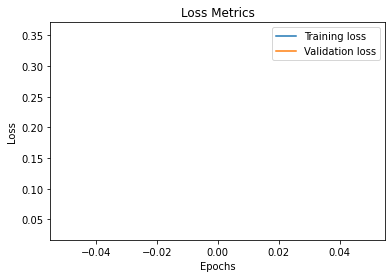

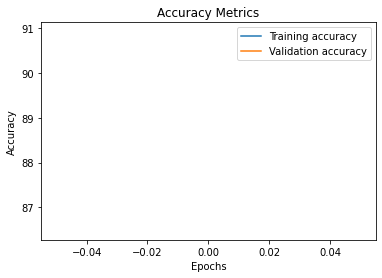

Finished Training

Training Duration 5.97 minutes
GPU memory used : 357450752 kb
GPU memory cached : 6694109184 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.151337  Accuracy: 9.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.532841  Accuracy: 76.176948%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.278046  Accuracy: 81.290717%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.846274  Accuracy: 83.919837%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.427929  Accuracy: 85.731036%
Epoch 1 | Training Accuracy: 85.731033% | Training Loss: 0.427929
Test accuracy: 93.425323% | Test Loss: 0.043595
Test accuracy (wo augmentation): 94.318184% | Test Loss: 0.747459
Test Metrics: 



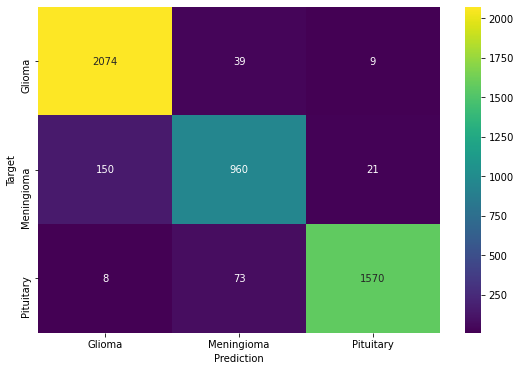


Accuracy Score: 0.9388

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2122
         1.0       0.90      0.85      0.87      1131
         2.0       0.98      0.95      0.97      1651

    accuracy                           0.94      4904
   macro avg       0.94      0.93      0.93      4904
weighted avg       0.94      0.94      0.94      4904


Precision Score (Class-Wise): 
[0.92921147 0.89552239 0.98125   ]
Average Precision Score: 0.9353279525312507

Recall Score (Class-Wise): 
[0.97737983 0.84880637 0.95093882]
Average Recall Score: 0.9257083404503487

F1 Score (Class-Wise): 
[0.95268718 0.87153881 0.96585666]
Average F1: 0.9300275514668302



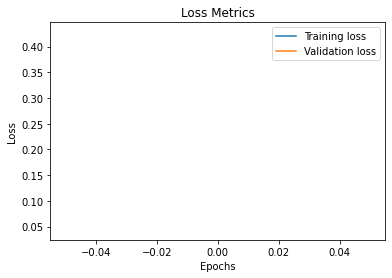

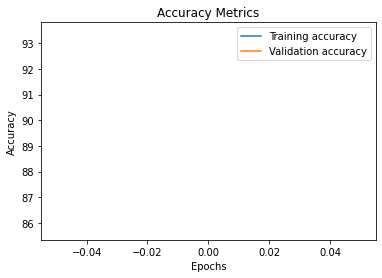

Test Metrics (wo augmentation): 



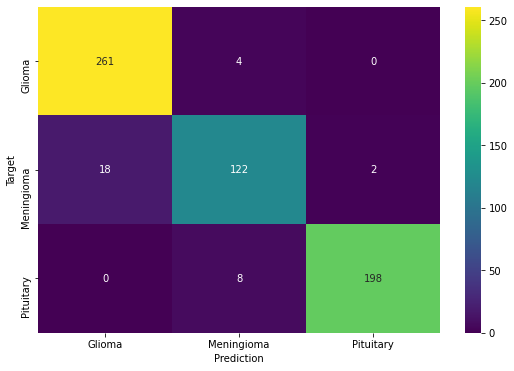


Accuracy Score: 0.9478

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       265
         1.0       0.91      0.86      0.88       142
         2.0       0.99      0.96      0.98       206

    accuracy                           0.95       613
   macro avg       0.95      0.94      0.94       613
weighted avg       0.95      0.95      0.95       613


Precision Score (Class-Wise): 
[0.93548387 0.91044776 0.99      ]
Average Precision Score: 0.9453105440539238

Recall Score (Class-Wise): 
[0.98490566 0.85915493 0.96116505]
Average Recall Score: 0.9350752128328376

F1 Score (Class-Wise): 
[0.95955882 0.88405797 0.97536946]
Average F1: 0.9396620842239943



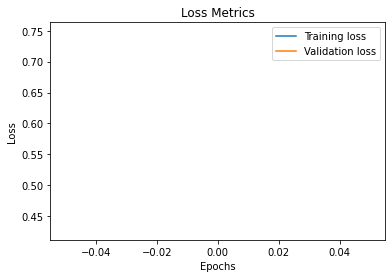

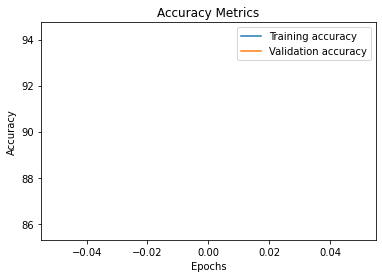

Finished Training

Training Duration 5.97 minutes
GPU memory used : 353861632 kb
GPU memory cached : 6694109184 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.123108  Accuracy: 15.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.232228  Accuracy: 76.948052%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.073659  Accuracy: 81.311075%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.258428  Accuracy: 84.252717%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.055353  Accuracy: 85.720840%
Epoch 1 | Training Accuracy: 85.720840% | Training Loss: 0.055353
Test accuracy: 94.257309% | Test Loss: 0.042753
Test accuracy (wo augmentation): 95.292206% | Test Loss: 0.007147
Test Metrics: 



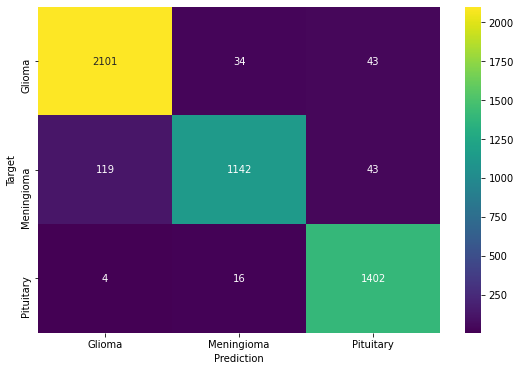


Accuracy Score: 0.9472

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2178
         1.0       0.96      0.88      0.92      1304
         2.0       0.94      0.99      0.96      1422

    accuracy                           0.95      4904
   macro avg       0.95      0.94      0.94      4904
weighted avg       0.95      0.95      0.95      4904


Precision Score (Class-Wise): 
[0.94469424 0.95805369 0.9422043 ]
Average Precision Score: 0.9483174123182511

Recall Score (Class-Wise): 
[0.96464646 0.87576687 0.9859353 ]
Average Recall Score: 0.9421162127343692

F1 Score (Class-Wise): 
[0.95456611 0.9150641  0.96357388]
Average F1: 0.9444013640136419



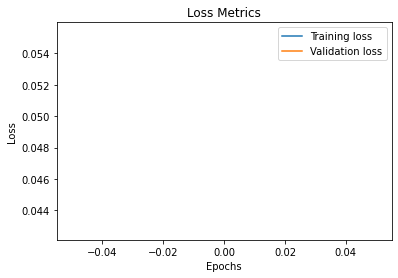

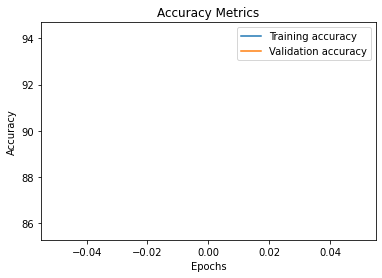

Test Metrics (wo augmentation): 



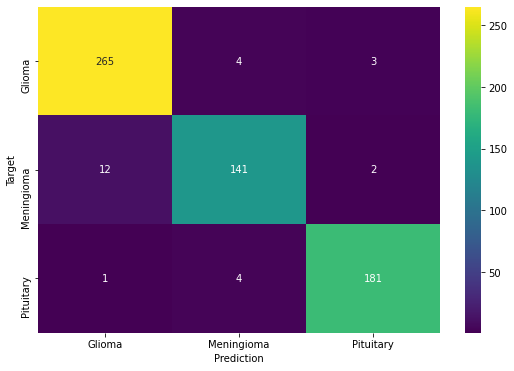


Accuracy Score: 0.9576

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       272
         1.0       0.95      0.91      0.93       155
         2.0       0.97      0.97      0.97       186

    accuracy                           0.96       613
   macro avg       0.96      0.95      0.95       613
weighted avg       0.96      0.96      0.96       613


Precision Score (Class-Wise): 
[0.95323741 0.94630872 0.97311828]
Average Precision Score: 0.9575548048246832

Recall Score (Class-Wise): 
[0.97426471 0.90967742 0.97311828]
Average Recall Score: 0.952353468269028

F1 Score (Class-Wise): 
[0.96363636 0.92763158 0.97311828]
Average F1: 0.9547954073845415



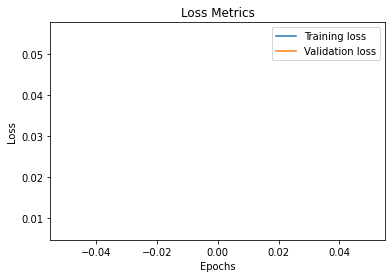

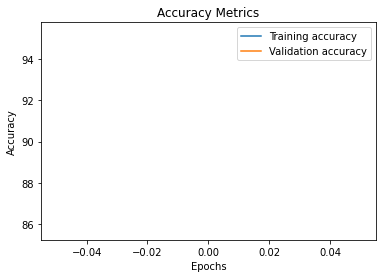

Finished Training

Training Duration 5.97 minutes
GPU memory used : 354790400 kb
GPU memory cached : 6694109184 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.146537  Accuracy: 34.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.797821  Accuracy: 78.449675%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.134556  Accuracy: 82.013436%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.073614  Accuracy: 84.544837%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.337244  Accuracy: 86.098083%
Epoch 1 | Training Accuracy: 86.098083% | Training Loss: 0.337244
Test accuracy: 92.933006% | Test Loss: 0.076647
Test accuracy (wo augmentation): 94.771240% | Test Loss: 0.128076
Test Metrics: 



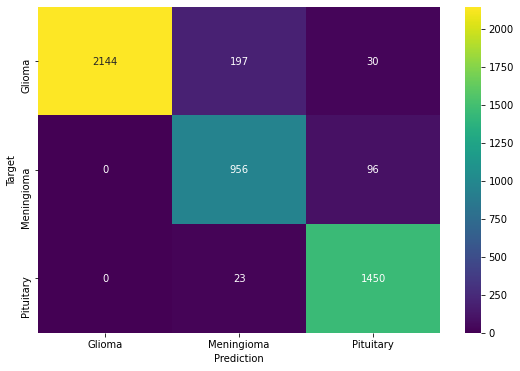


Accuracy Score: 0.9293

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      2371
         1.0       0.81      0.91      0.86      1052
         2.0       0.92      0.98      0.95      1473

    accuracy                           0.93      4896
   macro avg       0.91      0.93      0.92      4896
weighted avg       0.94      0.93      0.93      4896


Precision Score (Class-Wise): 
[1.         0.81292517 0.92005076]
Average Precision Score: 0.9109919771631155

Recall Score (Class-Wise): 
[0.90425981 0.90874525 0.98438561]
Average Recall Score: 0.9324635535802844

F1 Score (Class-Wise): 
[0.94972315 0.85816876 0.95113152]
Average F1: 0.919674474941158



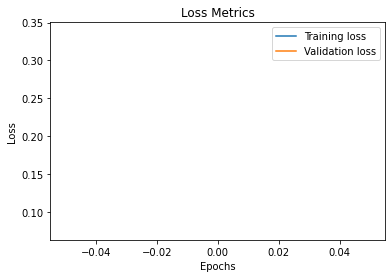

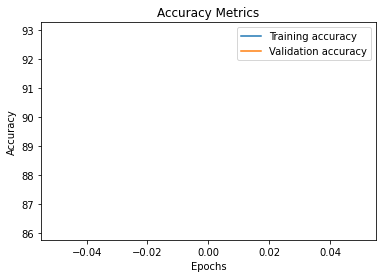

Test Metrics (wo augmentation): 



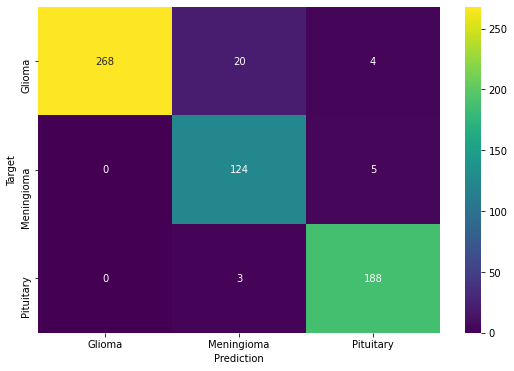


Accuracy Score: 0.9477

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       292
         1.0       0.84      0.96      0.90       129
         2.0       0.95      0.98      0.97       191

    accuracy                           0.95       612
   macro avg       0.93      0.95      0.94       612
weighted avg       0.95      0.95      0.95       612


Precision Score (Class-Wise): 
[1.         0.84353741 0.95431472]
Average Precision Score: 0.932617378592723

Recall Score (Class-Wise): 
[0.91780822 0.96124031 0.98429319]
Average Recall Score: 0.9544472409909597

F1 Score (Class-Wise): 
[0.95714286 0.89855072 0.96907216]
Average F1: 0.9415885822429972



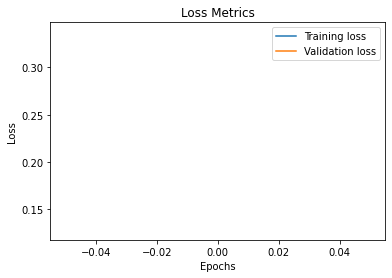

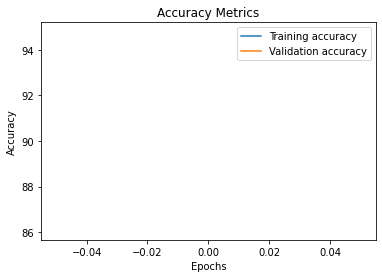

Finished Training

Training Duration 5.98 minutes
GPU memory used : 362351104 kb
GPU memory cached : 6694109184 kb



In [10]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'xception_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor_xception)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor_xception)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform_xception)
    
    model = xception()

    model.last_linear = nn.Linear(2048, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('xception_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.091442  Accuracy: 21.875000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.062971  Accuracy: 32.291667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.027739  Accuracy: 38.750000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.031435  Accuracy: 39.732143%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.970362  Accuracy: 43.402778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.976841  Accuracy: 43.465909%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.992982  Accuracy: 43.509615%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.036845  Accuracy: 43.541667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.073687  Accuracy: 43.566176%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.023286  Accuracy: 43.914474%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.892916  Accuracy: 44.047619%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.008616  Accuracy: 44.972826%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.978135  Accuracy: 44.75000

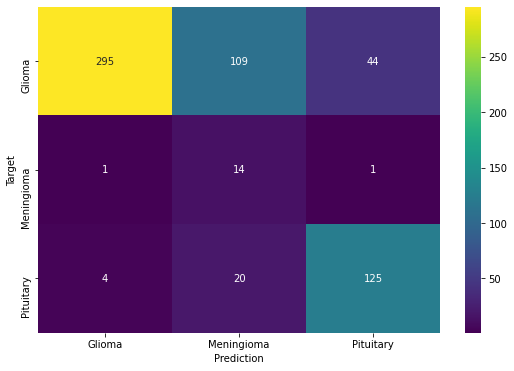


Accuracy Score: 0.7080

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79       448
         1.0       0.10      0.88      0.18        16
         2.0       0.74      0.84      0.78       149

    accuracy                           0.71       613
   macro avg       0.61      0.79      0.58       613
weighted avg       0.90      0.71      0.77       613


Precision Score (Class-Wise): 
[0.98333333 0.0979021  0.73529412]
Average Precision Score: 0.6055098496274967

Recall Score (Class-Wise): 
[0.65848214 0.875      0.83892617]
Average Recall Score: 0.7908027724512623

F1 Score (Class-Wise): 
[0.78877005 0.17610063 0.78369906]
Average F1: 0.5828565806559607

Finished Training

Training Duration 0.81 minutes
GPU memory used : 103486976 kb
GPU memory cached : 6694109184 kb


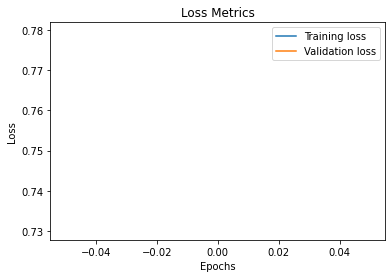

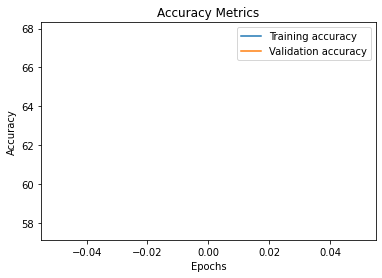

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.092833  Accuracy: 34.375000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.018499  Accuracy: 42.708333%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.952404  Accuracy: 47.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.103240  Accuracy: 44.642857%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.949381  Accuracy: 45.833333%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.076453  Accuracy: 43.750000%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.970692  Accuracy: 44.471154%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.019610  Accuracy: 44.791667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.020764  Accuracy: 44.485294%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.941610  Accuracy: 45.888158%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.876212  Accuracy: 46.577381%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.020348  Accuracy: 46.467391%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.957687  Accuracy: 46.37500

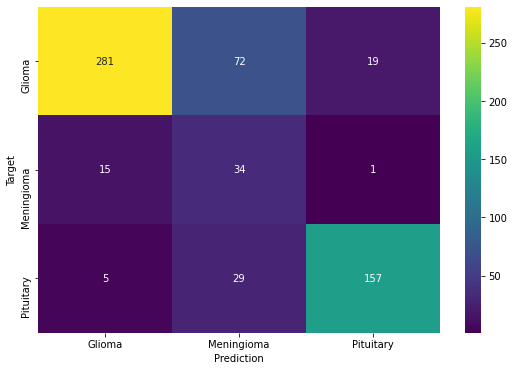


Accuracy Score: 0.7700

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       372
         1.0       0.25      0.68      0.37        50
         2.0       0.89      0.82      0.85       191

    accuracy                           0.77       613
   macro avg       0.69      0.75      0.69       613
weighted avg       0.86      0.77      0.80       613


Precision Score (Class-Wise): 
[0.93355482 0.25185185 0.88700565]
Average Precision Score: 0.6908041062817044

Recall Score (Class-Wise): 
[0.75537634 0.68       0.82198953]
Average Recall Score: 0.752455290960611

F1 Score (Class-Wise): 
[0.83506686 0.36756757 0.85326087]
Average F1: 0.6852984339724438

Finished Training

Training Duration 0.81 minutes
GPU memory used : 103240704 kb
GPU memory cached : 6694109184 kb


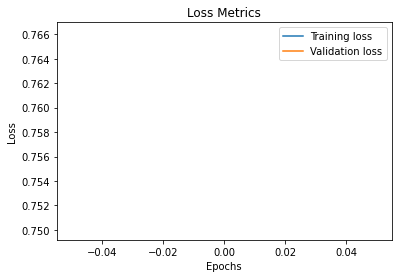

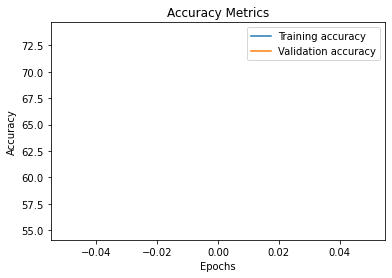

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.082502  Accuracy: 34.375000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.008307  Accuracy: 45.833333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.050166  Accuracy: 46.250000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.873000  Accuracy: 47.767857%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.957378  Accuracy: 49.652778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.819032  Accuracy: 50.568182%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.919984  Accuracy: 49.519231%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.993539  Accuracy: 49.583333%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.089294  Accuracy: 49.448529%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.897542  Accuracy: 49.013158%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.020508  Accuracy: 48.511905%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.956359  Accuracy: 48.777174%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.984946  Accuracy: 48.25000

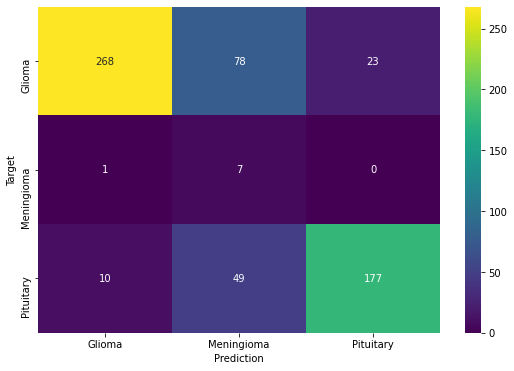


Accuracy Score: 0.7374

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       369
         1.0       0.05      0.88      0.10         8
         2.0       0.89      0.75      0.81       236

    accuracy                           0.74       613
   macro avg       0.63      0.78      0.58       613
weighted avg       0.92      0.74      0.81       613


Precision Score (Class-Wise): 
[0.96057348 0.05223881 0.885     ]
Average Precision Score: 0.6326040942242194

Recall Score (Class-Wise): 
[0.72628726 0.875      0.75      ]
Average Recall Score: 0.7837624209575429

F1 Score (Class-Wise): 
[0.82716049 0.09859155 0.81192661]
Average F1: 0.579226216209174

Finished Training

Training Duration 0.81 minutes
GPU memory used : 102985728 kb
GPU memory cached : 6694109184 kb


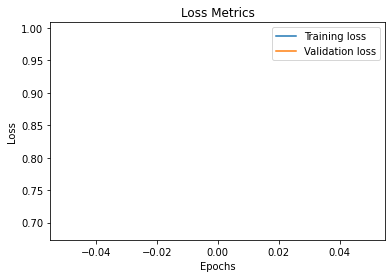

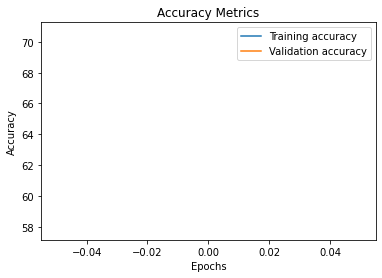

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.153380  Accuracy: 21.875000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.057996  Accuracy: 30.208333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.030172  Accuracy: 35.625000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.007019  Accuracy: 37.053571%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.912360  Accuracy: 39.930556%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.996988  Accuracy: 41.477273%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.997569  Accuracy: 41.826923%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.934145  Accuracy: 42.708333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.903743  Accuracy: 43.382353%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.082743  Accuracy: 43.914474%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.983778  Accuracy: 44.047619%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.965562  Accuracy: 44.021739%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.954081  Accuracy: 44.00000

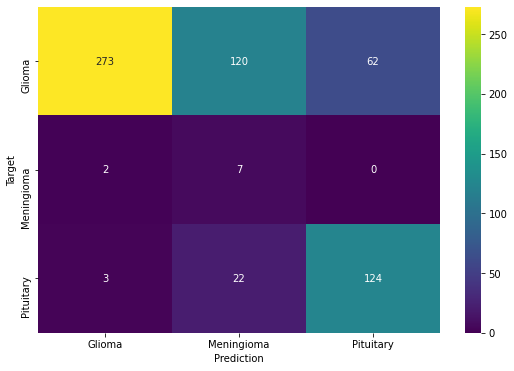


Accuracy Score: 0.6591

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74       455
         1.0       0.05      0.78      0.09         9
         2.0       0.67      0.83      0.74       149

    accuracy                           0.66       613
   macro avg       0.57      0.74      0.52       613
weighted avg       0.89      0.66      0.73       613


Precision Score (Class-Wise): 
[0.98201439 0.04697987 0.66666667]
Average Precision Score: 0.5652203069758958

Recall Score (Class-Wise): 
[0.6        0.77777778 0.83221477]
Average Recall Score: 0.736664180959483

F1 Score (Class-Wise): 
[0.74488404 0.08860759 0.74029851]
Average F1: 0.5245967135328589

Finished Training

Training Duration 0.81 minutes
GPU memory used : 102654464 kb
GPU memory cached : 6694109184 kb


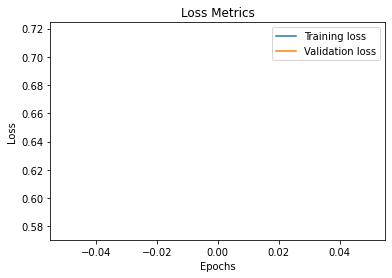

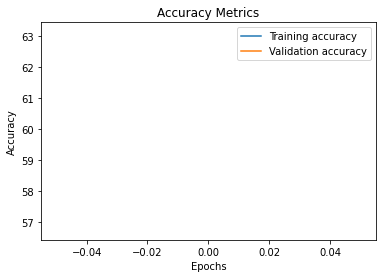

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.076492  Accuracy: 50.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.056713  Accuracy: 45.833333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.012762  Accuracy: 47.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.958038  Accuracy: 48.660714%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.934307  Accuracy: 49.305556%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.103847  Accuracy: 48.011364%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.071329  Accuracy: 48.317308%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.872199  Accuracy: 48.541667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.128657  Accuracy: 47.426471%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.058607  Accuracy: 46.217105%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.999094  Accuracy: 45.238095%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.934541  Accuracy: 45.652174%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.949948  Accuracy: 46.25000

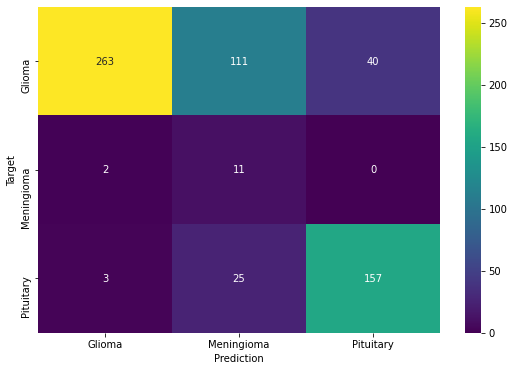


Accuracy Score: 0.7042

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77       414
         1.0       0.07      0.85      0.14        13
         2.0       0.80      0.85      0.82       185

    accuracy                           0.70       612
   macro avg       0.62      0.78      0.58       612
weighted avg       0.91      0.70      0.77       612


Precision Score (Class-Wise): 
[0.98134328 0.07482993 0.79695431]
Average Precision Score: 0.6177091767585635

Recall Score (Class-Wise): 
[0.6352657  0.84615385 0.84864865]
Average Recall Score: 0.7766893984285289

F1 Score (Class-Wise): 
[0.771261   0.1375     0.82198953]
Average F1: 0.5769168419544201

Finished Training

Training Duration 0.81 minutes
GPU memory used : 106402304 kb
GPU memory cached : 6694109184 kb


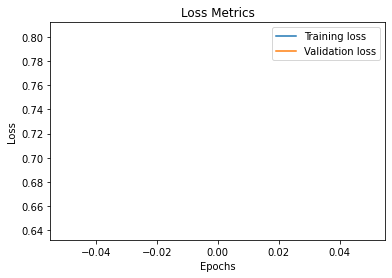

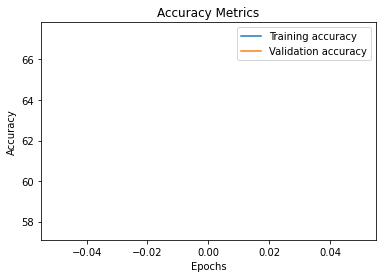

In [11]:
batch_size = 32

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'xception_frozen_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform_xception)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform_xception)
    
    model = xception()

    for params in model.parameters():
        params.requires_grad = False

    model.last_linear = nn.Linear(2048, 3)
    
    for params in model.last_linear.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('xception_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.047298  Accuracy: 62.500000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.935686  Accuracy: 49.695617%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.785537  Accuracy: 55.109935%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.962994  Accuracy: 57.812500%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.337706  Accuracy: 60.012235%
Epoch 1 | Training Accuracy: 60.012234% | Training Loss: 1.337706
Test accuracy: 71.631493% | Test Loss: 1.128066
Test accuracy (wo augmentation): 71.753250% | Test Loss: 0.857354
Test Metrics: 



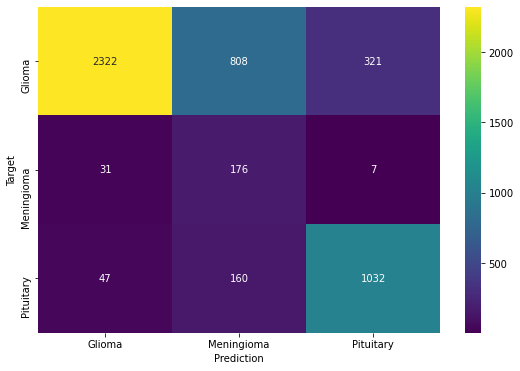


Accuracy Score: 0.7198

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79      3451
         1.0       0.15      0.82      0.26       214
         2.0       0.76      0.83      0.79      1239

    accuracy                           0.72      4904
   macro avg       0.63      0.78      0.62      4904
weighted avg       0.88      0.72      0.77      4904


Precision Score (Class-Wise): 
[0.9675     0.15384615 0.75882353]
Average Precision Score: 0.6267232277526396

Recall Score (Class-Wise): 
[0.67284845 0.82242991 0.83292978]
Average Recall Score: 0.7760693794496993

F1 Score (Class-Wise): 
[0.79371048 0.25920471 0.7941516 ]
Average F1: 0.6156889288075046



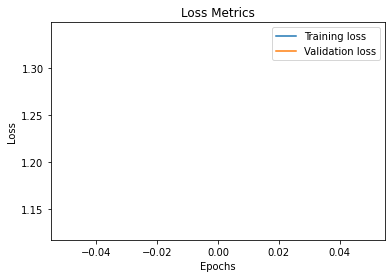

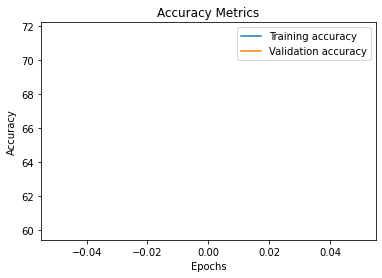

Test Metrics (wo augmentation): 



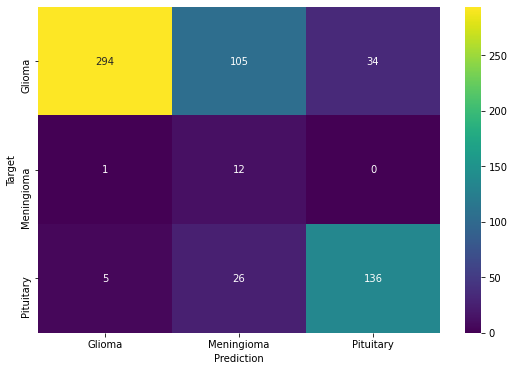


Accuracy Score: 0.7210

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80       433
         1.0       0.08      0.92      0.15        13
         2.0       0.80      0.81      0.81       167

    accuracy                           0.72       613
   macro avg       0.62      0.81      0.59       613
weighted avg       0.91      0.72      0.79       613


Precision Score (Class-Wise): 
[0.98       0.08391608 0.8       ]
Average Precision Score: 0.6213053613053613

Recall Score (Class-Wise): 
[0.67898383 0.92307692 0.81437126]
Average Recall Score: 0.8054773380933993

F1 Score (Class-Wise): 
[0.80218281 0.15384615 0.80712166]
Average F1: 0.5877168753118571



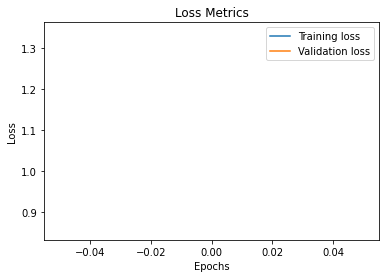

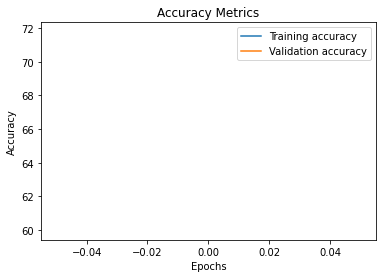

Finished Training

Training Duration 3.44 minutes
GPU memory used : 105465344 kb
GPU memory cached : 6694109184 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.139136  Accuracy: 6.250000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.676929  Accuracy: 50.081169%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.321866  Accuracy: 53.338762%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.938221  Accuracy: 56.705163%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.904697  Accuracy: 59.482055%
Epoch 1 | Training Accuracy: 59.482056% | Training Loss: 0.904697
Test accuracy: 71.651787% | Test Loss: 0.750534
Test accuracy (wo augmentation): 71.915581% | Test Loss: 0.507254
Test Metrics: 



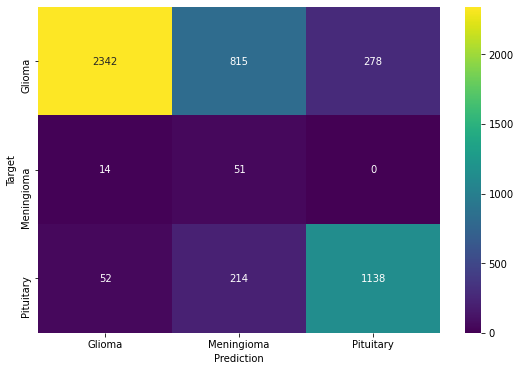


Accuracy Score: 0.7200

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80      3435
         1.0       0.05      0.78      0.09        65
         2.0       0.80      0.81      0.81      1404

    accuracy                           0.72      4904
   macro avg       0.61      0.76      0.57      4904
weighted avg       0.91      0.72      0.79      4904


Precision Score (Class-Wise): 
[0.97259136 0.04722222 0.80367232]
Average Precision Score: 0.6078286335775497

Recall Score (Class-Wise): 
[0.68180495 0.78461538 0.81054131]
Average Recall Score: 0.7589872147368508

F1 Score (Class-Wise): 
[0.80164299 0.08908297 0.8070922 ]
Average F1: 0.5659393865425906



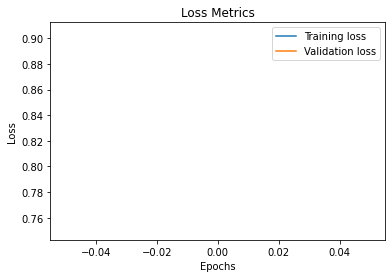

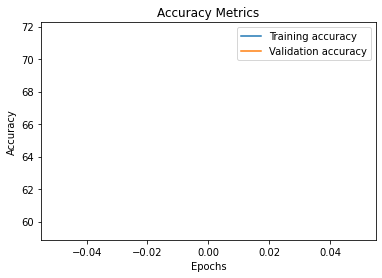

Test Metrics (wo augmentation): 



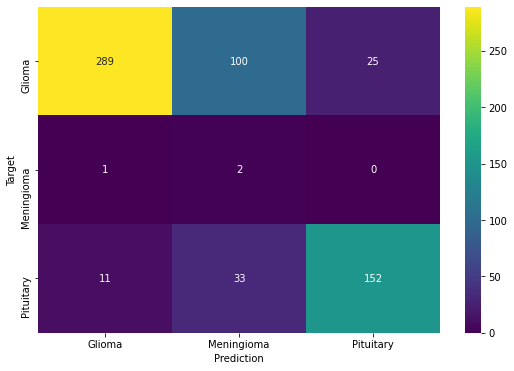


Accuracy Score: 0.7227

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81       414
         1.0       0.01      0.67      0.03         3
         2.0       0.86      0.78      0.82       196

    accuracy                           0.72       613
   macro avg       0.61      0.71      0.55       613
weighted avg       0.92      0.72      0.81       613


Precision Score (Class-Wise): 
[0.96013289 0.01481481 0.85875706]
Average Precision Score: 0.6112349224423853

Recall Score (Class-Wise): 
[0.69806763 0.66666667 0.7755102 ]
Average Recall Score: 0.7134148345328469

F1 Score (Class-Wise): 
[0.80839161 0.02898551 0.8150134 ]
Average F1: 0.5507968401545741



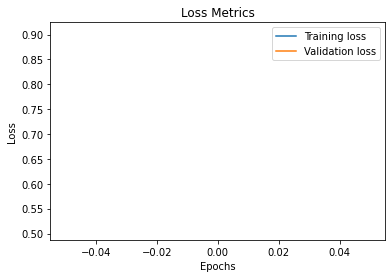

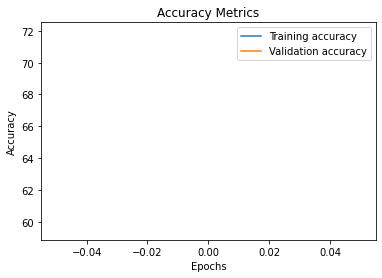

Finished Training

Training Duration 3.43 minutes
GPU memory used : 105884160 kb
GPU memory cached : 6694109184 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.120072  Accuracy: 15.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.637849  Accuracy: 51.643669%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.838951  Accuracy: 56.138029%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.414177  Accuracy: 58.756793%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.671943  Accuracy: 60.226346%
Epoch 1 | Training Accuracy: 60.226345% | Training Loss: 0.671943
Test accuracy: 79.951302% | Test Loss: 1.104622
Test accuracy (wo augmentation): 79.383118% | Test Loss: 0.275786
Test Metrics: 



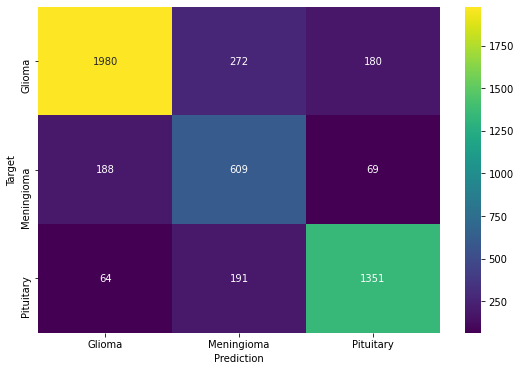


Accuracy Score: 0.8034

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      2432
         1.0       0.57      0.70      0.63       866
         2.0       0.84      0.84      0.84      1606

    accuracy                           0.80      4904
   macro avg       0.77      0.79      0.77      4904
weighted avg       0.82      0.80      0.81      4904


Precision Score (Class-Wise): 
[0.88709677 0.56809701 0.844375  ]
Average Precision Score: 0.7665229297063072

Recall Score (Class-Wise): 
[0.81414474 0.70323326 0.84122042]
Average Recall Score: 0.786199472201783

F1 Score (Class-Wise): 
[0.8490566  0.62848297 0.84279476]
Average F1: 0.7734447785783786



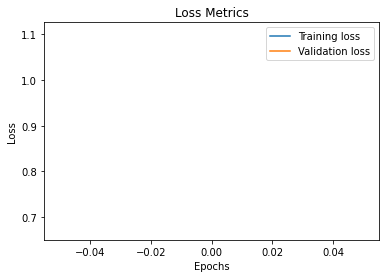

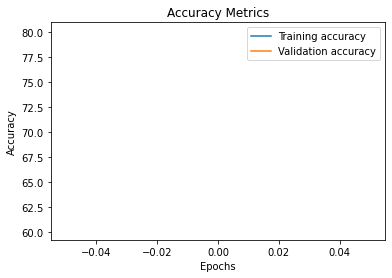

Test Metrics (wo augmentation): 



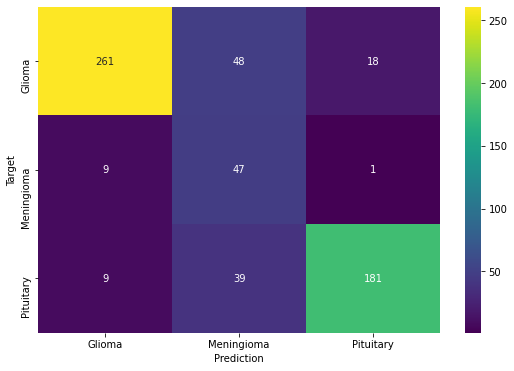


Accuracy Score: 0.7977

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86       327
         1.0       0.35      0.82      0.49        57
         2.0       0.91      0.79      0.84       229

    accuracy                           0.80       613
   macro avg       0.73      0.80      0.73       613
weighted avg       0.87      0.80      0.82       613


Precision Score (Class-Wise): 
[0.93548387 0.35074627 0.905     ]
Average Precision Score: 0.7304100465414862

Recall Score (Class-Wise): 
[0.79816514 0.8245614  0.79039301]
Average Recall Score: 0.8043731847412957

F1 Score (Class-Wise): 
[0.86138614 0.4921466  0.84382284]
Average F1: 0.7324518597651147



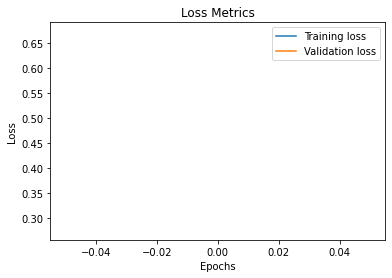

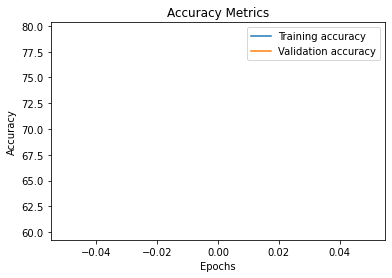

Finished Training

Training Duration 3.42 minutes
GPU memory used : 105465344 kb
GPU memory cached : 6694109184 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.111871  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.073038  Accuracy: 52.982955%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.664041  Accuracy: 57.512215%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.595532  Accuracy: 59.789402%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.961672  Accuracy: 61.047104%
Epoch 1 | Training Accuracy: 61.047104% | Training Loss: 0.961672
Test accuracy: 75.162338% | Test Loss: 0.393162
Test accuracy (wo augmentation): 76.623375% | Test Loss: 0.395535
Test Metrics: 



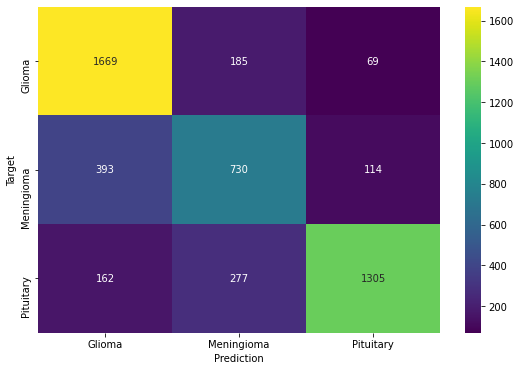


Accuracy Score: 0.7553

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80      1923
         1.0       0.61      0.59      0.60      1237
         2.0       0.88      0.75      0.81      1744

    accuracy                           0.76      4904
   macro avg       0.75      0.74      0.74      4904
weighted avg       0.76      0.76      0.75      4904


Precision Score (Class-Wise): 
[0.75044964 0.61241611 0.87701613]
Average Precision Score: 0.7466272922341927

Recall Score (Class-Wise): 
[0.86791472 0.59013743 0.74827982]
Average Recall Score: 0.7354439874555915

F1 Score (Class-Wise): 
[0.80491922 0.6010704  0.8075495 ]
Average F1: 0.7378463743347033



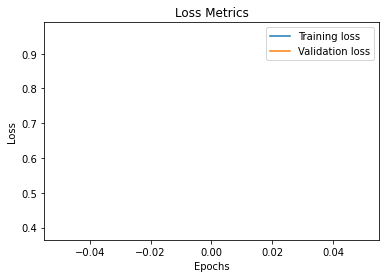

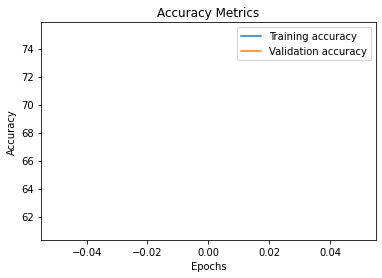

Test Metrics (wo augmentation): 



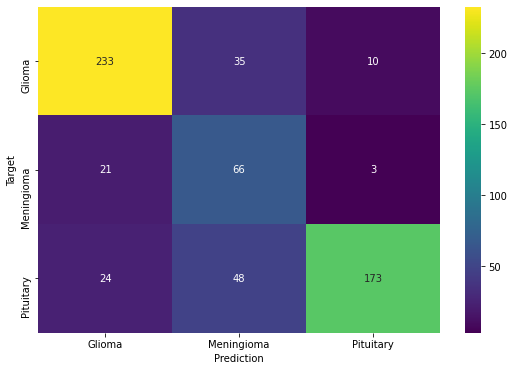


Accuracy Score: 0.7700

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       278
         1.0       0.44      0.73      0.55        90
         2.0       0.93      0.71      0.80       245

    accuracy                           0.77       613
   macro avg       0.74      0.76      0.73       613
weighted avg       0.82      0.77      0.78       613


Precision Score (Class-Wise): 
[0.8381295  0.44295302 0.93010753]
Average Precision Score: 0.7370633478062755

Recall Score (Class-Wise): 
[0.8381295  0.73333333 0.70612245]
Average Recall Score: 0.7591950929052675

F1 Score (Class-Wise): 
[0.8381295  0.55230126 0.80278422]
Average F1: 0.7310716581236073



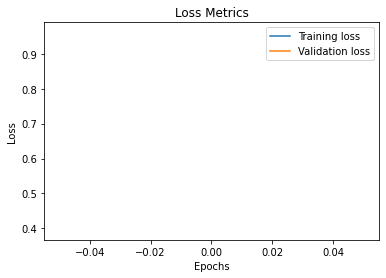

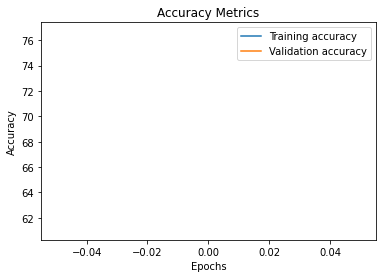

Finished Training

Training Duration 3.43 minutes
GPU memory used : 105091584 kb
GPU memory cached : 6694109184 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.098898  Accuracy: 40.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.889732  Accuracy: 51.846591%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.726192  Accuracy: 54.845277%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.831842  Accuracy: 57.248641%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.987400  Accuracy: 59.629894%
Epoch 1 | Training Accuracy: 59.629894% | Training Loss: 0.987400
Test accuracy: 77.920753% | Test Loss: 0.959880
Test accuracy (wo augmentation): 76.470589% | Test Loss: 1.084740
Test Metrics: 



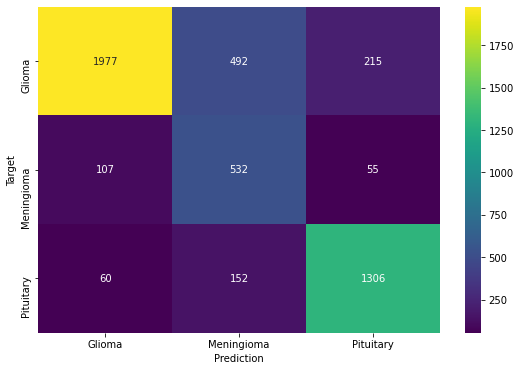


Accuracy Score: 0.7792

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      2684
         1.0       0.45      0.77      0.57       694
         2.0       0.83      0.86      0.84      1518

    accuracy                           0.78      4896
   macro avg       0.73      0.79      0.74      4896
weighted avg       0.83      0.78      0.79      4896


Precision Score (Class-Wise): 
[0.92210821 0.45238095 0.8286802 ]
Average Precision Score: 0.7343897881272872

Recall Score (Class-Wise): 
[0.73658718 0.76657061 0.86034256]
Average Recall Score: 0.7878334481635149

F1 Score (Class-Wise): 
[0.81897266 0.56898396 0.84421461]
Average F1: 0.7440570752086907



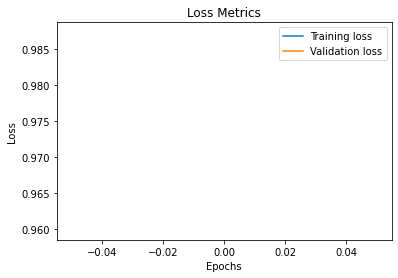

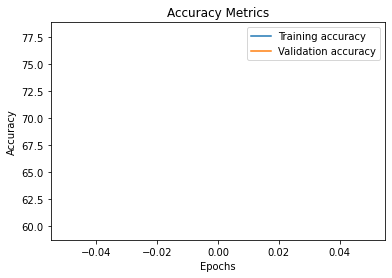

Test Metrics (wo augmentation): 



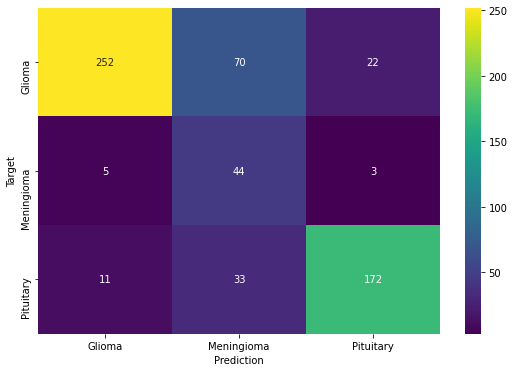


Accuracy Score: 0.7647

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82       344
         1.0       0.30      0.85      0.44        52
         2.0       0.87      0.80      0.83       216

    accuracy                           0.76       612
   macro avg       0.70      0.79      0.70       612
weighted avg       0.86      0.76      0.79       612


Precision Score (Class-Wise): 
[0.94029851 0.29931973 0.87309645]
Average Precision Score: 0.7042382273514503

Recall Score (Class-Wise): 
[0.73255814 0.84615385 0.7962963 ]
Average Recall Score: 0.7916694273283421

F1 Score (Class-Wise): 
[0.82352941 0.44221106 0.83292978]
Average F1: 0.6995567497078041



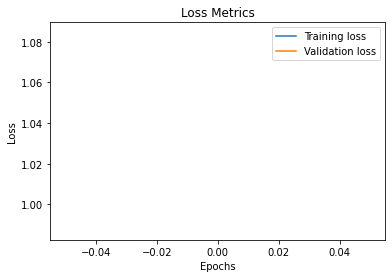

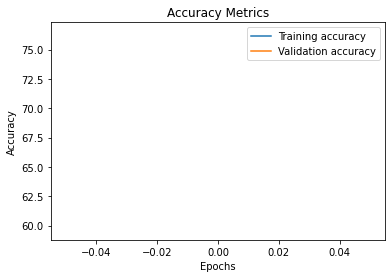

Finished Training

Training Duration 3.49 minutes
GPU memory used : 113834496 kb
GPU memory cached : 6694109184 kb



In [12]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'xception_frozen_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor_xception)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor_xception)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform_xception)
    
    model = xception()

    for params in model.parameters():
        params.requires_grad = False

    model.last_linear = nn.Linear(2048, 3)
    
    for params in model.last_linear.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('xception_test_results.csv', index=False)